#Apartemen Daegu

#Contents

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

#Business Problem Understanding

**Context**

Apartemen merupakan salah satu jawaban atas kebutuhan hunian masyarakat modern karena keterbatasan lahan hunian dan padatnya aktivitas bisnis di perkotaan. Oleh karena itu, akan sangat menarik untuk mengkaji harga apartemen yang dipengaruhi oleh berbagai faktor internal dan eksternal.

Stakeholder biasanya melakukan penawaran apartemen (unit). Penawar dapat menjual unit di platform dengan menentukan harga apartemen mereka. Dengan cara tersebut, cukup sulit bagi pemilik apartemen untuk menyesuaikan diri dengan harga pasar. Jika harga terlalu tinggi dibandingkan harga pasar, tentu akan sulit untuk melakukan penjualan. Sebaliknya, jika terlalu rendah, pemilik akan kesulitan untuk mendapatkan keuntungan maksimal.


**Problem Statement**


Stakeholder sering kesulitan dalam menentukan harga jual apartemen (unit) yang optimal agar sesuai dengan harga pasar dan memaksimalkan keuntungan. Jika harga yang ditawarkan terlalu tinggi dari harga pasar, unit akan sulit terjual. Sebaliknya, jika terlalu rendah, pemilik akan kehilangan potensi keuntungan maksimum.
Oleh karena itu, masalahnya adalah kurangnya metode yang akurat dan efisien untuk memprediksi Harga Jual (SalePrice) apartemen di Daegu dengan memanfaatkan berbagai fitur internal dan eksternal seperti lokasi (TimeToSubway, SubwayStation), fasilitas sekitar (N_FacilitiesNearBy), fasilitas di dalam apartemen (N_FacilitiesInApt, N_Parkinglot(Basement)), ukuran (Size(sqft)), dan usia bangunan (YearBuilt).

**Goal**

Berdasarkan pernyataan masalah tersebut stakeholder perlu memiliki 'tool' yang dapat memprediksi secara akurat Harga Jual (SalePrice) apartemen Daegu.
'Tool' yang dikembangkan harus mampu mengidentifikasi dan mengukur pengaruh relatif dari berbagai fitur (seperti ukuran, waktu ke stasiun subway, jumlah fasilitas, dll.) terhadap harga jual apartemen.
Hasil prediksi dari model tersebut dapat digunakan sebagai alat bantu yang objektif untuk membantu stakeholder dalam menyesuaikan dan menetapkan harga jual unit apartemen yang kompetitif di pasar.

**Analytic Approach**

Jadi, yang harus dilakukan adalah menganalisis data untuk mendapatkan pola dari fitur-fitur yang ada, yang membedakan satu apartemen dengan yang lainnya.

Selanjutnya, kita membuat mengembangkan dan mengevaluasi model regresi untuk dapat menyediakan suatu 'tool'  yang mampu memprediksi secara akurat Harga Jual (SalePrice) apartemen Daegu.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan.

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

# Data Understanding

Dataset merupakan data harga penjualan Apartemen Daegu
Berikut penjelasan terkait fitur fitur dataset :

*   HallwayType: Tipe apartemen
*   TimeToSubway: Waktu yang dibutuhkan ke stasiun kereta bawah tanah terdekat
*   SubwayStation: Nama stasiun kereta bawah tanah terdekat
*   N_FacilitiesNearBy(ETC): Jumlah fasilitas di sekitar
*   N_FacilitiesNearBy(PublicOffice): Jumlah fasilitas perkantoran di sekitar
*   N_SchoolNearBy(University): Jumlah universitas di sekitar
*   N_Parkinglot(Basement): Jumlah tempat parkir
*   YearBuilt: Tahun apartemen dibangun
*   N_FacilitiesInApt: Jumlah fasilitas di dalam apartemen
*   Size(sqft): Ukuran apartemen (dalam kaki persegi)
*   Sale Price : Harga Penjualan

In [4]:
# Terkait data prepocessing
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sb
import matplotlib.pyplot as plt

# Normalisasi
from scipy.stats import kstest


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data= '/content/drive/MyDrive/CapstoneProject'

In [7]:
df= pd.read_csv(f'{data}/data_daegu_apartment.csv')
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


In [8]:
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [9]:
df.tail()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451
4122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,868,250442


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


# Exploratory Data Analysis

**Distribusi Harga Penjualan Apartemen Daegu**

/tmp/ipython-input-2120265310.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['SalePrice'])


Text(0.5, 1.0, 'Price Distribution Plot')

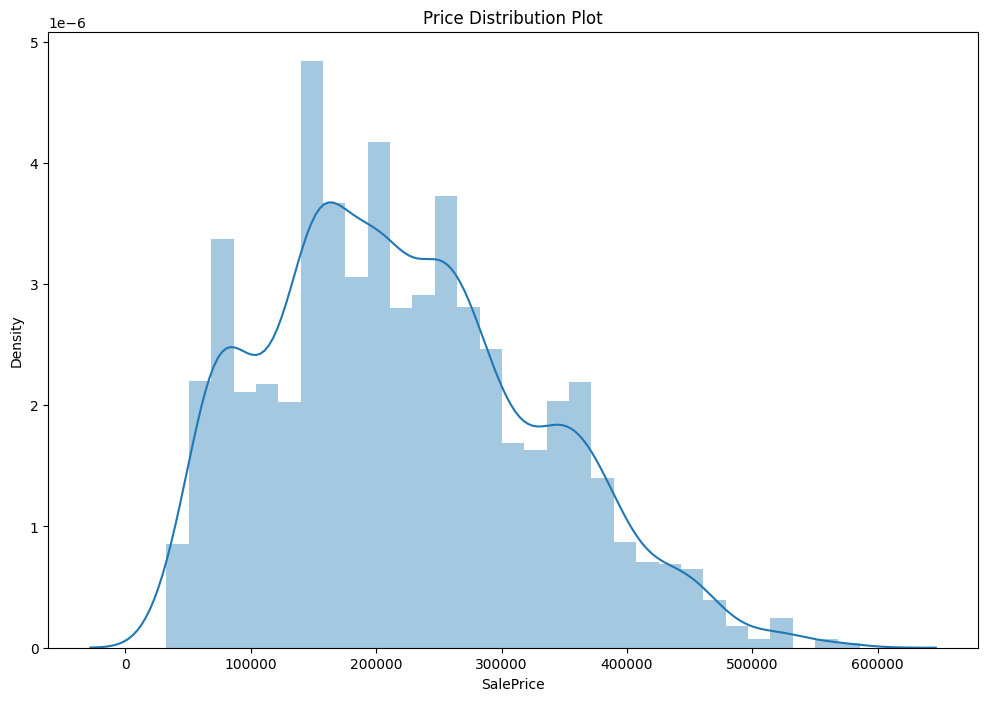

In [11]:
plt.figure(figsize=(12,8))
sb.distplot(df['SalePrice'])
plt.title('Price Distribution Plot')

Berdasarkan plot distribusi harga penjualan apartemen diatas, bahwa terdapat skewness positif pada fitur saleprice. Distribusi data miring ke kanan, di mana ekor distribusi lebih panjang di sisi kanan daripada sisi kiri tapi berdasarkan grafik diatas data tidak terlalu condong ke kanan . Ini menandakan sebagian besar nilai data terkonsentrasi pada nilai-nilai yang lumayan rendah, dan ada nilai-nilai ekstrem yang lebih tinggi di sisi kanan.

**Harga Jual Berdasarkan Tipe Apartemen**

In [12]:
number_apart = df['HallwayType'].value_counts()
number_apart

,count
HallwayType,
terraced,2528
mixed,1131
corridor,464


In [13]:
# Cek harga median untuk setiap tipe apartemen
df_median_price = df.groupby(by=['HallwayType']).agg({'SalePrice':'median'}).reset_index()
df_median_price = df_median_price.sort_values('SalePrice',ascending=False)
df_median_price


,HallwayType,SalePrice
2,terraced,264601.0
1,mixed,153539.0
0,corridor,74557.0


In [14]:
tabel_median_number_apart = pd.DataFrame({
    'HallwayType' : ['terraced', 'mixed','corridor'],
    'Number of Apart' : [2528,1131,464],
    'SalePrice' : [264601.0,153539.0,74557.0]
})
tabel_median_number_apart

,HallwayType,Number of Apart,SalePrice
0,terraced,2528,264601.0
1,mixed,1131,153539.0
2,corridor,464,74557.0


<Axes: >

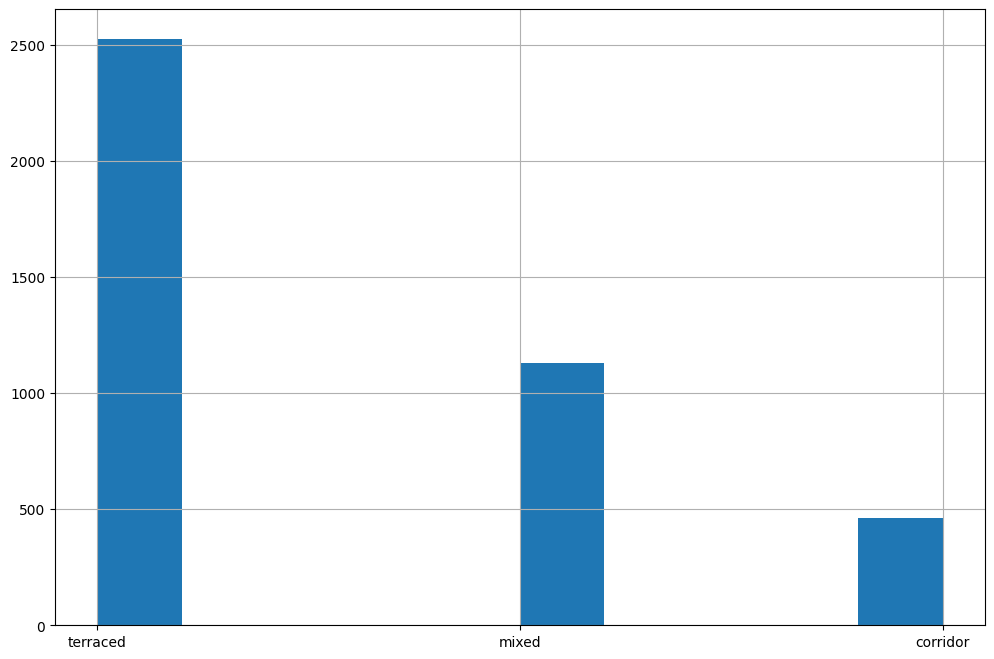

In [15]:
df['HallwayType'].hist(figsize=(12,8))

Menunjukkan bahwa properti yang dijual kebanyakan yang bertipe memiliki teras dengan harga rata-rata(median) sebesar 264.601 won dan tipe corrider yang memiliki nilai median terendah bahkan 2 kali lipat lebih rendah dibanding tipe mixed sebesar 74557 won.

# Data Preprocessing

Pada tahap ini, kita akan melakuakn cleaning pada data yang diguankan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:

1. Drop fitur yang tidak memiliki hubungan terhadap permasalahan yang sedang dihadapi.
2. Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya atau data jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan hasil dupliaksi dari dataframe yang sebelumnya digunakan

In [16]:
# membuat duplikasi dataframe
df_copy = df.copy()

In [17]:
pd.set_option('display.max_colwidth',None)
# Cek info setiap fitur
listItem = []
for col in df_copy.columns:
    listItem.append([col, df_copy[col].dtype, df_copy[col].isna().sum(),len(df_copy[col].unique()),df_copy[col].unique() ]);
df_copy_info = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniquevalue'],
                     data=listItem)
df_copy_info

,dataFeatures,dataType,null,unique,uniquevalue
0,HallwayType,object,0,3,"[terraced, mixed, corridor]"
1,TimeToSubway,object,0,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,object,0,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),float64,0,4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),float64,0,6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),float64,0,20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,int64,0,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,int64,0,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),int64,0,89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


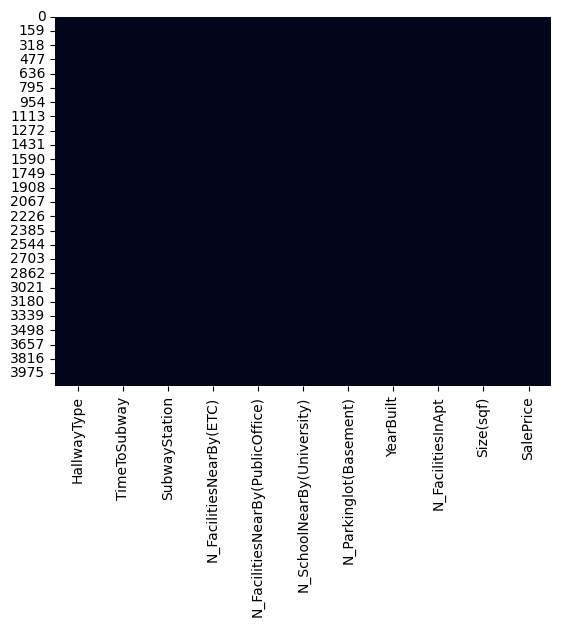

In [18]:
sb.heatmap(df_copy.isnull(),cbar=False);

Berdasarkan info dataset di atas bahwa tidak terdapat adanya kekosongan data

In [19]:
#cek data duplikat
duplicate_rows = df_copy.duplicated().sum()
print(f"Jumlah baris sebelum penghapusan: {len(df_copy)}")
print(f"Jumlah baris duplikat yang ditemukan: {duplicate_rows}")
print("-" * 40)

Jumlah baris sebelum penghapusan: 4123
Jumlah baris duplikat yang ditemukan: 1422
----------------------------------------


karena didapatkan data yang duplikat dan data tersebut kalau tetap dipakai akan berdampak bias untuk hasil data kita , maka diputuskan untuk meghilangkan data dupliakat

In [20]:
# Menghapus Baris Duplikat
df_cleaned = df_copy.drop_duplicates(keep='first')
#Verifikasi Hasil
rows_after_drop = len(df_cleaned)
rows_deleted = len(df_copy) - rows_after_drop
print(f"Jumlah baris setelah penghapusan duplikat: {rows_after_drop}")
print(f"Total baris yang dihapus: {rows_deleted}")
print("-" * 40)
print("\nDataFrame setelah duplikat dihapus (5 baris pertama):")
print(df_cleaned.head())

Jumlah baris setelah penghapusan duplikat: 2701
Total baris yang dihapus: 1422
----------------------------------------

DataFrame setelah duplikat dihapus (5 baris pertama):
  HallwayType TimeToSubway          SubwayStation  N_FacilitiesNearBy(ETC)  \
0    terraced       0-5min  Kyungbuk_uni_hospital                      0.0   
1    terraced  10min~15min  Kyungbuk_uni_hospital                      1.0   
2       mixed  15min~20min       Chil-sung-market                      1.0   
3       mixed   5min~10min                Bangoge                      5.0   
4    terraced       0-5min                Sin-nam                      0.0   

   N_FacilitiesNearBy(PublicOffice)  N_SchoolNearBy(University)  \
0                               3.0                         2.0   
1                               5.0                         1.0   
2                               7.0                         3.0   
3                               5.0                         4.0   
4                    

**Drop Columns**

Untuk melakukan drop kolom pada kolom dataset, kita perlu mempertimbangkan segala relevansi kolom dengan masalah, pada tahap awal ini kita bisa menggunakan domain knowledge untuk meninjau kolom yang dirasa tidak miliki relevansi terhadap masalah.

Berdasarkan analisis dataset di atas bahwa kami merasa semua kolom yang ada pada dataset memiliki relevansi dengan masalah.Jadi, kita tidak perlu menghapus kolom yang ada pada dataset.

**Missing Value**

In [21]:
# cek info dataset
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       2701 non-null   object 
 1   TimeToSubway                      2701 non-null   object 
 2   SubwayStation                     2701 non-null   object 
 3   N_FacilitiesNearBy(ETC)           2701 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   float64
 5   N_SchoolNearBy(University)        2701 non-null   float64
 6   N_Parkinglot(Basement)            2701 non-null   float64
 7   YearBuilt                         2701 non-null   int64  
 8   N_FacilitiesInApt                 2701 non-null   int64  
 9   Size(sqf)                         2701 non-null   int64  
 10  SalePrice                         2701 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 253.2+ KB


Di dataset ini hanya terdapat satu missing value pada kolom 'Year Built' yang sebelumnya bertige integer kita ganti menjadi object.

In [22]:
df_cleaned['YearBuilt'] = df_cleaned['YearBuilt'].astype(str)

/tmp/ipython-input-1724643395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['YearBuilt'] = df_cleaned['YearBuilt'].astype(str)


In [23]:
# cek kembali dataset
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       2701 non-null   object 
 1   TimeToSubway                      2701 non-null   object 
 2   SubwayStation                     2701 non-null   object 
 3   N_FacilitiesNearBy(ETC)           2701 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   float64
 5   N_SchoolNearBy(University)        2701 non-null   float64
 6   N_Parkinglot(Basement)            2701 non-null   float64
 7   YearBuilt                         2701 non-null   object 
 8   N_FacilitiesInApt                 2701 non-null   int64  
 9   Size(sqf)                         2701 non-null   int64  
 10  SalePrice                         2701 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 253.2+ KB


In [24]:
# Cek kembali seluruh info fitur
df_cleaned.describe(include='all')

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,2701,2701,2701,2701.000000,2701.000000,2701.000000,2701.000000,2701,2701.000000,2701.000000,2701.000000
unique,3,5,8,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN
top,terraced,0-5min,Myung-duk,NaN,NaN,NaN,NaN,2007,NaN,NaN,NaN
freq,1667,1248,709,NaN,NaN,NaN,NaN,542,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.890411,4.027027,2.680489,533.746390,NaN,5.713439,984.028878,229511.365790
std,NaN,NaN,NaN,2.153168,1.887486,1.504470,418.224859,NaN,2.386552,391.982619,105079.891321
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,135.000000,32743.000000
25%,NaN,NaN,NaN,0.000000,3.000000,2.000000,181.000000,NaN,4.000000,743.000000,153539.000000
50%,NaN,NaN,NaN,1.000000,4.000000,2.000000,536.000000,NaN,5.000000,910.000000,221238.000000
75%,NaN,NaN,NaN,5.000000,5.000000,4.000000,798.000000,NaN,7.000000,1167.000000,300884.000000


**Numerical Analysis**

** Data Correlation **

In [25]:
df_numerical = df_cleaned.select_dtypes(exclude='object').columns
df_numerical

Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice'],
      dtype='object')

In [26]:
df_numerical_features = df_cleaned[df_numerical]
df_numerical_features

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),N_FacilitiesInApt,Size(sqf),SalePrice
0,0.0,3.0,2.0,1270.0,10,1387,346017
1,1.0,5.0,1.0,0.0,4,914,150442
2,1.0,7.0,3.0,56.0,5,558,61946
3,5.0,5.0,4.0,798.0,7,914,165486
4,0.0,1.0,2.0,536.0,5,1743,311504
...,...,...,...,...,...,...,...
4116,0.0,1.0,2.0,536.0,5,818,290265
4117,5.0,6.0,5.0,536.0,4,1761,345132
4118,0.0,3.0,2.0,475.0,8,914,323008
4119,5.0,6.0,5.0,536.0,4,1451,242477


<Axes: >

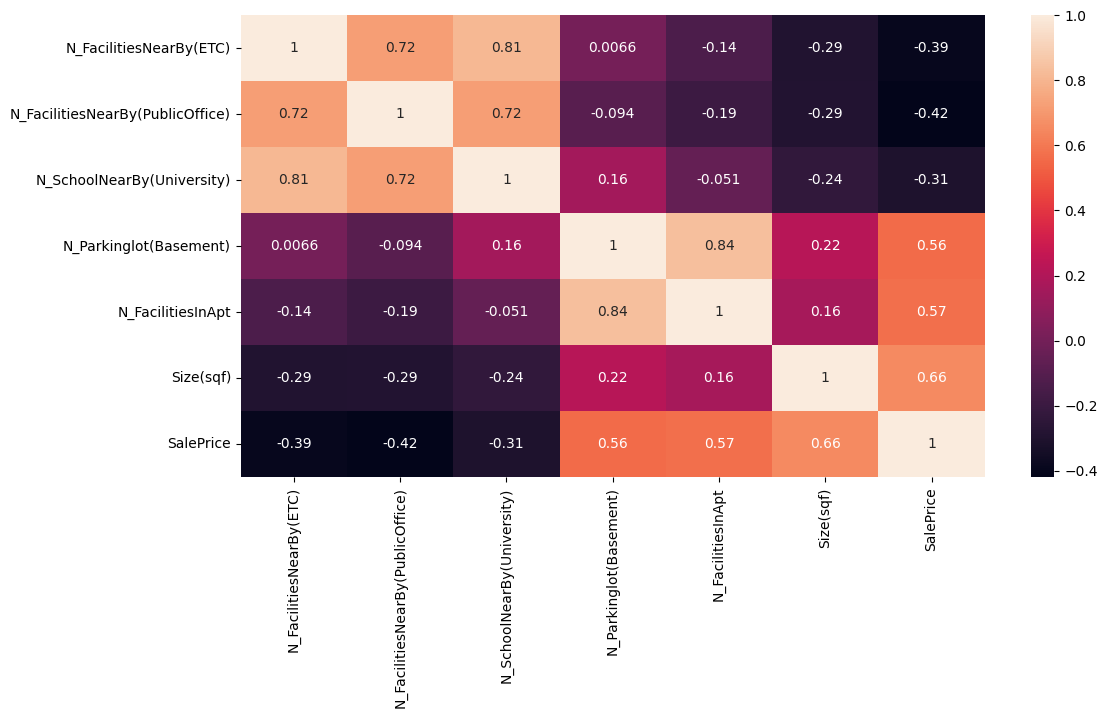

In [27]:
plt.figure(figsize=(12,6))
sb.heatmap(
    df_numerical_features.corr(),
    annot=True
)

Berdasarkan data di atas bahwa tidak ada fitur  yang berkolerasi kuat dengan fitur price. Terdapat fitur yang berkolerasi kuat seperti fitur N_SchoolNearBy(University) dengan Fitur N_FacilitiesNearBy(ETC) sebesar 0.81.
Tetapi saya memutuskan untuk tidak menghapus fitur fitur tersebut dikarena jika model yang dipakai nanti adalah model linier maka fitur yang berkorelasi kuat akan di hapus tapi jika yang dipakai adalah model non-linier maka akan dipertahankan supaya keakuratan informasi tetap terjaga.

**Normalisasi Data**

untuk menentukan metode analisis statistik yang tepat agar hasilnya akurat dan valid maka perlunya untuk mengetahui data berdistribusi normal atau tidak

In [28]:
def showNormalityAssesment(dataset, feature):
    _ , p_value= kstest(dataset[feature], 'norm')

    if p_value > 0.05:
        print(f"Fitur {feature} berdistribusi normal")
    else:
        print(f"Fitur {feature} tidak berdistribusi normal")


In [29]:
for columns in df_numerical_features.columns :
    showNormalityAssesment(df_numerical_features,columns)

Fitur N_FacilitiesNearBy(ETC) tidak berdistribusi normal
Fitur N_FacilitiesNearBy(PublicOffice) tidak berdistribusi normal
Fitur N_SchoolNearBy(University) tidak berdistribusi normal
Fitur N_Parkinglot(Basement) tidak berdistribusi normal
Fitur N_FacilitiesInApt tidak berdistribusi normal
Fitur Size(sqf) tidak berdistribusi normal
Fitur SalePrice tidak berdistribusi normal


Berdasarkan data di atas menunjukkan  bahwa semua feature numerik tidak berdistribusi normal

**Outliers Detection**

untuk meningkatkan akurasi dan validitas analisis dengan cara mengidentifikasi potensi kesalahan data, memahami pola data yang sebenarnya dengan lebih baik, serta mengambil keputusan yang lebih tepat maka diperlunya mengetahui data tersebut memiliki data outliers atau tidak.

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'N_FacilitiesNearBy(ETC)'),
  Text(2, 0, 'N_FacilitiesNearBy(PublicOffice)'),
  Text(3, 0, 'N_SchoolNearBy(University)'),
  Text(4, 0, 'N_Parkinglot(Basement)'),
  Text(5, 0, 'N_FacilitiesInApt'),
  Text(6, 0, 'Size(sqf)'),
  Text(7, 0, 'SalePrice')])

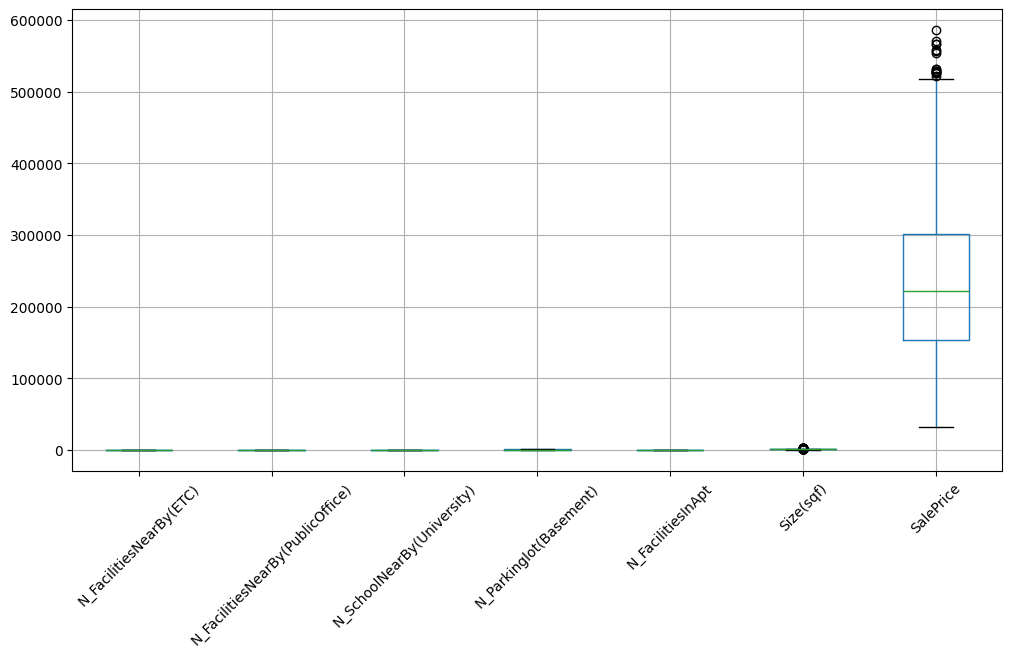

In [30]:
plt.figure(figsize= (12,6))
df_numerical_features.boxplot()

plt.xticks(rotation = 45)

Dari data diatas kita ketahui bahwa ada dua feature yang ada data outliers yakni sale price dan size , maka lebih baik menggunakan metode robust untuk scalling data dimana teknik ini yg tahan terhadap data outliers

**Categorical Analysis**

In [31]:
df_categorical = df_cleaned.select_dtypes(include='object').columns
df_categorical

Index(['HallwayType', 'TimeToSubway', 'SubwayStation', 'YearBuilt'], dtype='object')

In [32]:
feature_unique_number_list, feature_unique_list = [], []

for categorical_feature in df_categorical:

    unique_list = df_copy[categorical_feature].unique()
    unique_amount_list = len(df_copy[categorical_feature].unique())

    feature_unique_list.append(unique_list)
    feature_unique_number_list.append(unique_amount_list)

In [33]:
pd.set_option('display.max_colwidth',None)
pd.DataFrame({
    'Feature' : df_categorical,
    'Number of Unique Value': feature_unique_number_list,
    'Unique Value' : feature_unique_list
    })

,Feature,Number of Unique Value,Unique Value
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"


In [34]:
df_modelling_copy =  df_cleaned.copy()
df_modelling_copy.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


#Modeling

In [35]:
%pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.0 MB/s eta 0:00:00


In [36]:
# Import library untuk modeling

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score,KFold

from sklearn.impute import SimpleImputer
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error




Untuk memudahkan kita memecah proses mechine learning menjadin langkah-langkah modular yang jelas maka kita dapat menggunakan model pipeline.

**Encoding**

scalling di butuhkan untuk proses pengubahan skala data agar memiliki rata rata nol dan variasi satu. Kita juga perlu melakukan encoding untuk pengubah fitur kategorikal menjadi fitur numerikal.

In [37]:
numerical_feature_preprocess_pipeline = Pipeline([
    # step 1 : missing value handling
    ('numerical_feature_imputation', SimpleImputer(strategy= "median")),
    # step 2 : feature scaling
    ('numerical_feature_scaling', RobustScaler())
])

categorical_feature_preprocess_pipeline = Pipeline([
    # step 1 : missing value handling
    ('categorical_feature_imputation', SimpleImputer(strategy= "most_frequent")),
    # step 2 : feature scaling
    ('categorical_feature_encoding', BinaryEncoder())
])

In [38]:
num_feature_list = df_cleaned.drop(columns = 'SalePrice').select_dtypes(exclude= object).columns
num_feature_list

Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)',
       'N_FacilitiesInApt', 'Size(sqf)'],
      dtype='object')

In [39]:
cat_feature_list = df_cleaned.drop(columns='HallwayType').select_dtypes(include= object).columns
cat_feature_list

Index(['TimeToSubway', 'SubwayStation', 'YearBuilt'], dtype='object')

In [40]:
fetaure_transformer = ColumnTransformer([
    ('numerical_feature_preprocess', numerical_feature_preprocess_pipeline,num_feature_list),
    ('categorical_feature_preprocess',categorical_feature_preprocess_pipeline,cat_feature_list),
    ('onehot_encoding', OneHotEncoder(drop= 'first'), ['HallwayType'])
],remainder='passthrough'
)

In [41]:
fetaure_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical_feature_preprocess',
                                 Pipeline(steps=[('numerical_feature_imputation',
                                                  SimpleImputer(strategy='median')),
                                                 ('numerical_feature_scaling',
                                                  RobustScaler())]),
                                 Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)',
       'N_FacilitiesInApt', 'Size(sqf)'],
      dtype='object')),
                                ('categorical_feature_preprocess',
                                 Pipeline(steps=[('categorical_feature_imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('categorical_feature_encoding',
                                                  BinaryEncoder())]),
                                 Index(['TimeToSubway', 'SubwayStation', 'YearBuilt'], dtype='object')),
                                ('onehot_encoding', OneHotEncoder(drop='first'),
                                 ['HallwayType'])])

**Data Splitting**

In [42]:
#defini variabel
X= df_cleaned.drop(columns = 'SalePrice')
y = df_cleaned.SalePrice

**Train and Test Splitting**

In [43]:
X_train,X_test,y_train, y_test =train_test_split(
    X,
    y,
    train_size= 0.8,
    random_state=1,
    shuffle= True
)

In [44]:
fetaure_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical_feature_preprocess',
                                 Pipeline(steps=[('numerical_feature_imputation',
                                                  SimpleImputer(strategy='median')),
                                                 ('numerical_feature_scaling',
                                                  RobustScaler())]),
                                 Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)',
       'N_FacilitiesInApt', 'Size(sqf)'],
      dtype='object')),
                                ('categorical_feature_preprocess',
                                 Pipeline(steps=[('categorical_feature_imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('categorical_feature_encoding',
                                                  BinaryEncoder())]),
                                 Index(['TimeToSubway', 'SubwayStation', 'YearBuilt'], dtype='object')),
                                ('onehot_encoding', OneHotEncoder(drop='first'),
                                 ['HallwayType'])])

In [45]:
X_train_preprocess = fetaure_transformer.fit_transform(X_train)
X_test_preprocess = fetaure_transformer.transform(X_test)

In [46]:
fetaure_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical_feature_preprocess',
                                 Pipeline(steps=[('numerical_feature_imputation',
                                                  SimpleImputer(strategy='median')),
                                                 ('numerical_feature_scaling',
                                                  RobustScaler())]),
                                 Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)',
       'N_FacilitiesInApt', 'Size(sqf)'],
      dtype='object')),
                                ('categorical_feature_preprocess',
                                 Pipeline(steps=[('categorical_feature_imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('categorical_feature_encoding',
                                                  BinaryEncoder())]),
                                 Index(['TimeToSubway', 'SubwayStation', 'YearBuilt'], dtype='object')),
                                ('onehot_encoding', OneHotEncoder(drop='first'),
                                 ['HallwayType'])])

In [47]:
fetaure_transformer.transformers_[0]

('numerical_feature_preprocess',
 Pipeline(steps=[('numerical_feature_imputation',
                  SimpleImputer(strategy='median')),
                 ('numerical_feature_scaling', RobustScaler())]),
 Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
        'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)',
        'N_FacilitiesInApt', 'Size(sqf)'],
       dtype='object'))

In [48]:
numerical_feature_list_preprocess_result = fetaure_transformer.transformers_[0][1].get_feature_names_out()
numerical_feature_list_preprocess_result

array(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)',
       'N_FacilitiesInApt', 'Size(sqf)'], dtype=object)

In [49]:
categorical_feature_list_preprocess_result = fetaure_transformer.transformers_[1][1].get_feature_names_out()
categorical_feature_list_preprocess_result

array(['0_0', '0_1', '0_2', '1_0', '1_1', '1_2', '1_3', '2_0', '2_1',
       '2_2', '2_3', '2_4'], dtype=object)

In [50]:
onehot_feature_list_preprocess_result = fetaure_transformer.transformers_[2][1].get_feature_names_out()
onehot_feature_list_preprocess_result

array(['HallwayType_mixed', 'HallwayType_terraced'], dtype=object)

In [51]:
fetaure_transformer.transformers_

[('numerical_feature_preprocess',
  Pipeline(steps=[('numerical_feature_imputation',
                   SimpleImputer(strategy='median')),
                  ('numerical_feature_scaling', RobustScaler())]),
  Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
         'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)',
         'N_FacilitiesInApt', 'Size(sqf)'],
        dtype='object')),
 ('categorical_feature_preprocess',
  Pipeline(steps=[('categorical_feature_imputation',
                   SimpleImputer(strategy='most_frequent')),
                  ('categorical_feature_encoding',
                   BinaryEncoder(cols=[0, 1, 2],
                                 mapping=[{'col': 0,
                                           'mapping':     0_0  0_1  0_2
   1    0    0    1
   2    0    1    0
   3    0    1    1
   4    1    0    0
   5    1    0    1
  -1    0    0    0
  -2    0    0    0},
                                          {'col': 1,
                 

In [52]:
dataset_preprocess  =pd.DataFrame(X_train_preprocess)
dataset_preprocess.columns = list(numerical_feature_list_preprocess_result)+ list(categorical_feature_list_preprocess_result)+ list(onehot_feature_list_preprocess_result)
dataset_preprocess

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),N_FacilitiesInApt,Size(sqf),0_0,0_1,0_2,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,2_4,HallwayType_mixed,HallwayType_terraced
0,0.2,-0.5,-0.5,-0.575365,-0.333333,-0.015873,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.2,-0.5,0.0,1.189627,1.666667,-0.095238,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.8,1.5,1.5,-0.868720,-0.666667,-0.757370,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,-0.2,0.5,0.5,0.638574,0.666667,-0.603175,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.8,1.0,1.5,0.000000,-0.333333,-0.603175,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,0.2,-1.0,-0.5,-0.539708,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2156,0.8,0.5,1.0,0.424635,0.666667,-0.378685,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2157,0.0,1.5,0.5,-0.777958,0.000000,-0.603175,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
2158,-0.2,-1.5,0.0,0.000000,0.000000,1.195011,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


**Model Development**

In [53]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = RobustScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:

    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', fetaure_transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-53543.5549382  -55570.19553749 -53424.70022378 -49906.94419925
 -52981.3602126 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-41203.06387218 -44432.11164608 -42635.82912904 -39472.69694359
 -41209.64672822] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.20427785 -0.21480199 -0.20944825 -0.19537585 -0.21690794] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-49769.23469436 -49647.14519329 -48621.65002608 -48526.11858267
 -49769.78397059] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-37873.67908518 -38933.17163909 -38155.76368175 -37278.95600769
 -39063.40605991] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,


In [54]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-53085.351022,1822.780568,-41790.669664,1658.154156,-0.208162,0.007756
1,KNN Regressor,-49266.786493,568.317414,-38260.995295,666.509231,-0.187229,0.009301
2,DecisionTree Regressor,-46694.326070,1069.001626,-36800.265736,505.927686,-0.182303,0.005574
3,RandomForest Regressor,-46680.974555,1104.219971,-36759.445839,466.460474,-0.182011,0.005677
4,XGBoost Regressor,-46696.098437,1064.891240,-36788.514062,545.768720,-0.182725,0.005573


Berdasarkan model diatas kita mengacu pada nilai RMSE karena nilai ini sering kali berhubungan erat dengan fungsi kerugian (loss function) yang digunakan oleh model boosting seperti XGBoost, sehingga RMSE menjadi indikator yang sangat baik tentang seberapa baik model telah dioptimalkan.RMSE dianggap lebih baik karena secara tegas menghukum kesalahan yang paling merugikan dalam domain harga properti.

Nilai mean dari metrik (misalnya, Mean_RMSE) menunjukkan kinerja prediktif rata-rata model di seluruh dataset atau di seluruh fold cross-validation yang dilakukan yang bertujuan untuk mengukur seberapa baik model secara umum .Nilai standar deviasi dari metrik (misalnya, Std_RMSE) menunjukkan variabilitas atau konsistensi kinerja model di seluruh fold cross-validation yang bertujuan untuk mengukur stabilitas dan ketahanan (robustness) model terhadap variasi dalam data.

Berdasarkan data diatas 3 model yang memiliki kinerja terbaik dilihat dari nilai mean rmse terendah adalah model DecisionTree Regressor,RandomForest Regressor	, dan XGBoost Regressor. Karena nilai 3 model diatas tidak memiliki selisih yang terlalu signifikan. Maka kita buat eksperimen di 3 model tersebut untuk mengetahui model mana yang terbaik

In [55]:
# Pemilihan model terbaik
models = {
    'XGBoost': XGBRegressor(random_state=1),
    'DecisionTree' : DecisionTreeRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', fetaure_transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGBoost,47124.234784,38293.640625,0.194452
DecisionTree,47125.161368,38294.454406,0.194457
RandomForest,47131.428212,38296.715624,0.194432


Berdasarkan data prediksi diatas bisa kita ketahui bahwa model XGBoost memiliki performa yang baik dibandingkan 2 model lainya karena memili nilai RMSE sedikit lebih rendah dibanding model lainnya serta memiliki  nilai MAE dan MAPE biarpun bukan yang teredah tapi perbedaanya sangat tipis.

**Hyperparameter Tunning**

Berdasarkan data predisksi model random forest merupakan model yang paling terbaik untuk dataset ini. Maka, kita akan melakuakn hyperparameter tunning untuk meningkat kinerja model ini.

In [56]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [57]:

xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algoritma
estimator_xgb = Pipeline([
        ('preprocessing', fetaure_transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb,
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1
)

In [58]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numerical_feature_preprocess',
                                                                               Pipeline(steps=[('numerical_feature_imputation',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('numerical_feature_scaling',
                                                                                                RobustScaler())]),
                                                                               Index(['N_FacilitiesNe...
                                                             np.float64(3.593813663804626),
                                                             np.float64(10.0)],
                                        'model__subsample': [np.float64(0.2),
                                                             np.float64(0.3),
                                                             np.float64(0.4),
                                                             np.float64(0.5),
                                                             np.float64(0.6),
                                                             np.float64(0.7),
                                                             np.float64(0.8),
                                                             np.float64(0.9)]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [59]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
23,0.181230,0.018715,0.033080,0.002161,0.9,3.593814,153,4,0.33,9,...,557.896924,2,-0.183125,-0.189703,-0.191336,-0.182292,-0.200292,-0.189350,0.006517,2
22,0.170956,0.003769,0.032816,0.001312,0.7,0.002783,155,4,0.25,8,...,716.390365,1,-0.183000,-0.188671,-0.193171,-0.180550,-0.199722,-0.189023,0.006927,1
3,0.231865,0.017357,0.035846,0.000978,0.5,0.021544,166,8,0.10,9,...,593.733970,3,-0.185177,-0.187322,-0.191972,-0.181808,-0.200534,-0.189362,0.006486,3
42,0.174461,0.003708,0.033623,0.000804,0.3,3.593814,118,6,0.18,6,...,538.511356,9,-0.183154,-0.190884,-0.190132,-0.183430,-0.200017,-0.189523,0.006165,4
17,0.235603,0.015932,0.036589,0.003774,0.6,0.001000,190,5,0.04,9,...,735.591834,6,-0.183219,-0.191488,-0.193850,-0.181485,-0.202375,-0.190483,0.007583,13


In [60]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -46468.49765625
Best_params: {'model__subsample': np.float64(0.9), 'model__reg_alpha': np.float64(3.593813663804626), 'model__n_estimators': np.int64(153), 'model__max_depth': np.int64(4), 'model__learning_rate': np.float64(0.33), 'model__gamma': np.int64(9), 'model__colsample_bytree': np.float64(0.3)}


Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [61]:
model = {'XGB': XGBRegressor(random_state=1)}
xgb_tuning = random_xgb.best_estimator_

xgb_tuning.fit(X_train, y_train)

# Prediksi test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

rmse_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_tuning, 'MAE': mae_tuning, 'MAPE': mape_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,46871.119978,38085.722656,0.194184


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [62]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGBoost']).T

,RMSE,MAE,MAPE
XGBoost,47124.234784,38293.640625,0.194452


In [63]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,46871.119978,38085.722656,0.194184


In [64]:
final = pd.DataFrame({
    'Score' : ['Before Tuning', 'After  Tuning'],
    'RMSE' : [47.12,46.8],
    'MAE' : [38.29,38.15],
    'MAPE' : [0.19,0.19]
})
final

,Score,RMSE,MAE,MAPE
0,Before Tuning,47.12,38.29,0.19
1,After Tuning,46.80,38.15,0.19


Dengan melakukan hyperparameter tunning performa model lebih meningkat dibandingkan dengan tidak melakukan hyperparameter tunning, dengan nilai RMSE,MAE dan MAPEnya menurun.
- RMSE, MAE & MAPE sebelum tuning: 47.12, 38.29, 0.19
- RMSE, MAE & MAPE setelah tuning: 46.8, 38.15, 0.19

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (price), kita dapat mengeceknya melalui function feature_importances_.

In [65]:
xgb_tuning['model'].feature_importances_

array([1.6118199e-02, 3.5671736e-03, 4.2372886e-03, 3.1161958e-03,
       2.1375481e-02, 5.4333322e-02, 2.2732796e-02, 2.6762632e-01,
       1.3700755e-01, 1.3808816e-02, 3.0800521e-02, 3.5629836e-03,
       3.1012030e-02, 2.6799698e-04, 3.4399931e-03, 8.0206888e-03,
       7.9274504e-03, 8.7510817e-02, 4.3846890e-03, 2.7914974e-01],
      dtype=float32)

In [66]:
feature_importance_df = pd.DataFrame({
    'Feature' : dataset_preprocess.columns,
    'Feature Importance' : xgb_tuning['model'].feature_importances_
})
feature_importance_df.sort_values(by = 'Feature Importance', ascending = False, inplace = True)
feature_importance_df


,Feature,Feature Importance
19,HallwayType_terraced,0.279150
7,0_1,0.267626
8,0_2,0.137008
17,2_4,0.087511
5,Size(sqf),0.054333
12,1_3,0.031012
10,1_1,0.030801
6,0_0,0.022733
4,N_FacilitiesInApt,0.021375
0,N_FacilitiesNearBy(ETC),0.016118


<Axes: xlabel='Feature Importance', ylabel='Feature'>

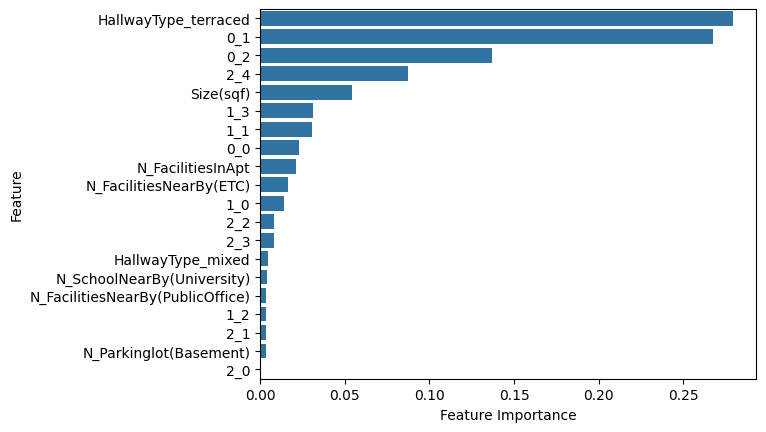

In [67]:
sb.barplot(
    data= feature_importance_df,
    x = 'Feature Importance',
    y = 'Feature'
)

# Conclution

Berdasarkan data di bahwa fitur  'HallwayType	'('HallwayType_terraced') ,'Size'dan 'N_FacilitiesInApt' merupakan fitur yang paling berpengaruh terhadap fitur 'Sale Price'
Berdasarkan model diatas kita mengacu pada nilai RMSE setelah dilakukan hyperparamter tunning sebesar 46781 won . Kita dapat menyimpulakn bahwa Rata-rata, prediksi harga model Anda melenceng **+- 46871 won** dari harga jual apartemen yang sebenarnya.

Ada kemungkinan prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila kita hitung berdasarkan hasil model sebesar +- 46871 won . Bias yang dihasilkan bisa terjadi karena kurangnya fitur fitur yang dapat menunjang improvisasi prediksi pada model.

Lakukan A/B testing terhadap model untuk mengoptimalkan kinerja, meningkatkan rasio konversi, dan mendapatkan wawasan tentang preferensi pengguna berdasarkan data yang terkumpul.

# Recomendations

1. Menambahkan fitur yang lebih korelatif terhadap fitur 'saleprice' seperti 'Bedroom','Bathroom', dan 'Room' serta fitur lokasi seperti 'address','Lattitude', dan 'Longtitude' agar dapat dibuatkan grafik bertujuan agar stakeholder lebih mudah membaca persebaran apartemennya(data) serta adanya penambahan data terkini dan tentu akan dapat mengimprovisasi kapasitas prediksi dari model.
2. Model yang sudah dibangun ini bisa dimanfaatkan untuk pengembangan model selanjutnya semisal adanya data terbaru yang didapat ditahun berikutnya.
3. Setelah kita melakuakn A/B testing kita dapat Mengecek prediksi mana saja yang memiliki nilai error yang tinggi. Lalu, kita dapat mengelompokkan nilai mean dari nilai error tersebut. Setelahnya kita bisa mengecek hubungan antara error tersebut dengan tiap variabel independen. Pada akhirnya kita dapat mengetahui sebenarnya variabel mana saja dan aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga kita bisa melakukan training ulang dengan penerapan feature engineering lainnya.
4. Hasil feature importance harus digunakan oleh stakeholder untuk menginformasikan keputusan mereka. Contoh, fitur  'HallwayType	'('HallwayType_terraced') sangat penting, investasi lebih lanjut dalam tipe apartemen terutama yang memiliki teras terbukti memberikan laba atas investasi yang baik (Return on Investment) atau fitur 'Size' salah satu fitur yang sangat penting, investasi lebih lanjut dalam luas apartemen terbukti memberikan laba atas investasi yang baik (Return on Investment)

# Save Model

In [68]:
import pickle

In [69]:
model = Pipeline([('preprocess', fetaure_transformer), ('model', XGBRegressor())])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical_feature_preprocess',
                                                  Pipeline(steps=[('numerical_feature_imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('numerical_feature_scaling',
                                                                   RobustScaler())]),
                                                  Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Par...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [70]:
pickle.dump(model, open('Model_apartemen_XGB.sav', 'wb'))

In [74]:
filename = 'Model_apartemen_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [75]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

np.float64(47124.23478423814)